In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Load a dataset from a CSV file
tortilla_prices_path = (r'C:\Users\ashle\Tortillas-Project\tortilla_prices.csv')

In [72]:
tortilla_df = pd.read_csv(tortilla_prices_path)

In [73]:
# Check for missing values
print(tortilla_df.isnull().sum())

State                    0
City                     0
Year                     0
Month                    0
Day                      0
Store type               0
Price per kilogram    6390
dtype: int64


In [74]:
tortilla_df.count()

State                 284394
City                  284394
Year                  284394
Month                 284394
Day                   284394
Store type            284394
Price per kilogram    278004
dtype: int64

In [75]:
# Drop missing values
tortilla_df = tortilla_df.dropna(how='any')

In [76]:
tortilla_df.count()

State                 278004
City                  278004
Year                  278004
Month                 278004
Day                   278004
Store type            278004
Price per kilogram    278004
dtype: int64

In [77]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278004 non-null  object 
 1   City                278004 non-null  object 
 2   Year                278004 non-null  int64  
 3   Month               278004 non-null  int64  
 4   Day                 278004 non-null  int64  
 5   Store type          278004 non-null  object 
 6   Price per kilogram  278004 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 17.0+ MB


In [78]:
tortilla_df=tortilla_df[~tortilla_df["Year"].isna()]

In [79]:
tortilla_df[["Year","Month","Day"]]=tortilla_df[["Year","Month","Day"]].astype(int)

In [80]:
# Create a new 'date' column with the concatenated date 

tortilla_df['Date'] = tortilla_df['Month'].astype(str).str.zfill(2) + '/' + tortilla_df['Day'].astype(str).str.zfill(2) + '/' + tortilla_df['Year'].astype(str)

In [81]:
tortilla_df.head()

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9,01/10/2007
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0,01/10/2007
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0,01/10/2007
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0,01/10/2007
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.0,01/10/2007


In [82]:
tortilla_df["Date"]=pd.to_datetime(tortilla_df["Date"])

In [83]:
tortilla_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278004 entries, 0 to 284393
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   State               278004 non-null  object        
 1   City                278004 non-null  object        
 2   Year                278004 non-null  int32         
 3   Month               278004 non-null  int32         
 4   Day                 278004 non-null  int32         
 5   Store type          278004 non-null  object        
 6   Price per kilogram  278004 non-null  float64       
 7   Date                278004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(3), object(3)
memory usage: 15.9+ MB


## Comparison of Mom and Pop Stores vs. Retail Stores Over Time

In [84]:
df_cleaned = tortilla_df[(tortilla_df != 0).all(axis=1)]
df_cleaned

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00,2007-01-10
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00,2007-01-10
...,...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50,2024-07-08
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60,2024-07-08
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33,2024-07-08
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40,2024-07-08


In [91]:
print(df_cleaned[df_cleaned['Year'] == 2007])

                     State            City  Year  Month  Day  \
0           Aguascalientes  Aguascalientes  2007      1   10   
2          Baja California         Tijuana  2007      1   10   
3      Baja California Sur          La Paz  2007      1   10   
4                 Campeche        Campeche  2007      1   10   
5                 Coahuila  Piedras Negras  2007      1   10   
...                    ...             ...   ...    ...  ...   
16372             Veracruz       Poza Rica  2007     12   31   
16373             Veracruz        Veracruz  2007     12   31   
16374             Veracruz          Xalapa  2007     12   31   
16375              Yucatán          Mérida  2007     12   31   
16376            Zacatecas       Zacatecas  2007     12   31   

              Store type  Price per kilogram       Date  
0      Mom and Pop Store                9.90 2007-01-10  
2      Mom and Pop Store               10.00 2007-01-10  
3      Mom and Pop Store               10.00 2007-01-10  

In [98]:
print(df_cleaned[df_cleaned['Year'] == 2024])

                      State            City  Year  Month  Day  \
276186       Aguascalientes  Aguascalientes  2024      1    3   
276187      Baja California        Mexicali  2024      1    3   
276188      Baja California         Tijuana  2024      1    3   
276189  Baja California Sur          La Paz  2024      1    3   
276190             Campeche        Campeche  2024      1    3   
...                     ...             ...   ...    ...  ...   
284389             Veracruz   Coatzacoalcos  2024      7    8   
284390             Veracruz        Veracruz  2024      7    8   
284391             Veracruz          Xalapa  2024      7    8   
284392              Yucatán          Mérida  2024      7    8   
284393            Zacatecas       Zacatecas  2024      7    8   

               Store type  Price per kilogram       Date  
276186  Mom and Pop Store               21.67 2024-01-03  
276187  Mom and Pop Store               30.57 2024-01-03  
276188  Mom and Pop Store               25

In [110]:
print(df_cleaned[df_cleaned['Store type'].isin(['Mom and Pop Store', 'Big Retail Store'])])

                      State            City  Year  Month  Day  \
0            Aguascalientes  Aguascalientes  2007      1   10   
2           Baja California         Tijuana  2007      1   10   
3       Baja California Sur          La Paz  2007      1   10   
4                  Campeche        Campeche  2007      1   10   
5                  Coahuila  Piedras Negras  2007      1   10   
...                     ...             ...   ...    ...  ...   
284389             Veracruz   Coatzacoalcos  2024      7    8   
284390             Veracruz        Veracruz  2024      7    8   
284391             Veracruz          Xalapa  2024      7    8   
284392              Yucatán          Mérida  2024      7    8   
284393            Zacatecas       Zacatecas  2024      7    8   

               Store type  Price per kilogram       Date  
0       Mom and Pop Store                9.90 2007-01-10  
2       Mom and Pop Store               10.00 2007-01-10  
3       Mom and Pop Store               10

In [106]:
# Filter by Store Types in 2007

filtered_df07 = df_cleaned[(df_cleaned['Store type'].isin(['Mom and Pop Store', 'Big Retail Store'])) & (df_cleaned['Year'] == 2007)]
filtered_df07

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90,2007-01-10
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00,2007-01-10
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00,2007-01-10
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00,2007-01-10
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00,2007-01-10
...,...,...,...,...,...,...,...,...
16372,Veracruz,Poza Rica,2007,12,31,Big Retail Store,5.83,2007-12-31
16373,Veracruz,Veracruz,2007,12,31,Big Retail Store,5.80,2007-12-31
16374,Veracruz,Xalapa,2007,12,31,Big Retail Store,5.80,2007-12-31
16375,Yucatán,Mérida,2007,12,31,Big Retail Store,5.73,2007-12-31


In [107]:
# Display 2007 Store Type Counts

store_type_counts = filtered_df07['Store type'].value_counts()
store_type_counts

Store type
Mom and Pop Store    8287
Big Retail Store     7837
Name: count, dtype: int64

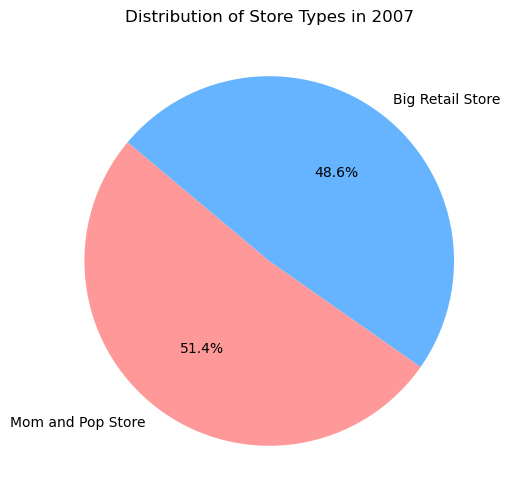

In [109]:
# Create the pie chart

plt.figure(figsize=(8, 6))
plt.pie(store_type_counts, 
        labels=store_type_counts.index, 
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title('Distribution of Store Types in 2007')
plt.show()

In [108]:
# Filter by Store Types in 2024

filtered_df24 = df_cleaned[(df_cleaned['Store type'].isin(['Mom and Pop Store', 'Big Retail Store'])) & (df_cleaned['Year'] == 2024)]
filtered_df24

,State,City,Year,Month,Day,Store type,Price per kilogram,Date
276186,Aguascalientes,Aguascalientes,2024,1,3,Mom and Pop Store,21.67,2024-01-03
276187,Baja California,Mexicali,2024,1,3,Mom and Pop Store,30.57,2024-01-03
276188,Baja California,Tijuana,2024,1,3,Mom and Pop Store,25.64,2024-01-03
276189,Baja California Sur,La Paz,2024,1,3,Mom and Pop Store,27.00,2024-01-03
276190,Campeche,Campeche,2024,1,3,Mom and Pop Store,26.00,2024-01-03
...,...,...,...,...,...,...,...,...
284389,Veracruz,Coatzacoalcos,2024,7,8,Big Retail Store,12.50,2024-07-08
284390,Veracruz,Veracruz,2024,7,8,Big Retail Store,13.60,2024-07-08
284391,Veracruz,Xalapa,2024,7,8,Big Retail Store,14.33,2024-07-08
284392,Yucatán,Mérida,2024,7,8,Big Retail Store,13.40,2024-07-08


In [113]:
# Display 2024 Store Type Counts

store_type_counts_24 = filtered_df24['Store type'].value_counts()
store_type_counts_24

Store type
Mom and Pop Store    4103
Big Retail Store     4103
Name: count, dtype: int64

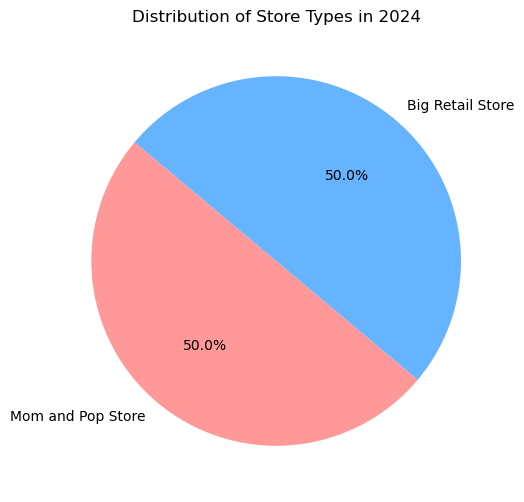

In [114]:
# Create the pie chart

plt.figure(figsize=(8, 6))
plt.pie(store_type_counts_24, 
        labels=store_type_counts.index, 
        autopct='%1.1f%%', 
        colors=['#ff9999', '#66b3ff'],
        startangle=140)
plt.title('Distribution of Store Types in 2024')
plt.show()